#  Анализ компьютерных игр
На основе анализа данных о продажах игр, жанрах и платформах, выявить определяющие успешность игр.

In [1]:
## Скачаем нужные нам библиотеки , на примере мы показали библиотеку "sklearn"

In [2]:
#installed library sklearn
#pip install sklearn - for example

## Импортируем и откроем файл с данными и изучим общую информацию.

# Начало 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # this is most popular library in ML 
df=pd.read_csv('vgsales.csv')
#Читаем данные, которые будем использовать


In [4]:
df # Наш ДатаФрейм

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
# Проверяем первые 5 значений нашего набора данных 
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Наблюдаем за нашими столбцами и типами данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Проверяем последние 5 значений нашего набора данных 
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [8]:
# Смотрим на наши числовые значения.
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<AxesSubplot:>

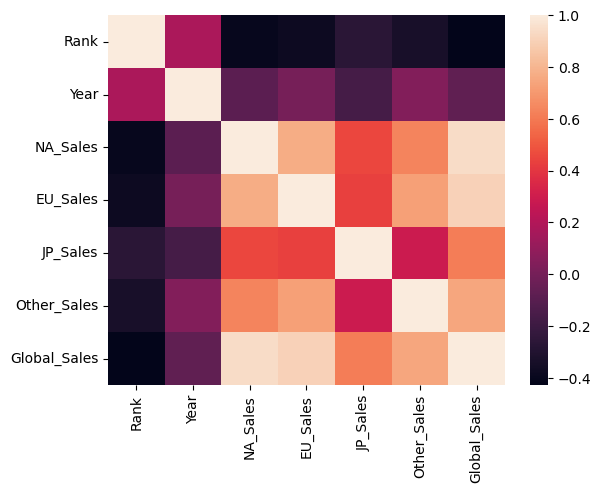

In [9]:
# Мы наблюдаем статус корреляции наших данных.
sns.heatmap(df.corr())

In [10]:
# Проверяем общее количество нулей в наших данных.
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# Мы смотрим на количество строк и количество атрибутов в нашем наборе данных.
df.shape 

(16598, 11)

## Для комментирования нашего кода мы использовали основы html "ul -> li"
<br>

<li>Столбцы с годом и рейтингом пользователей находятся не в оптимальных для данных параметров типах данных.
<li> Пропусков в годах и жанрах мало (меньше 5%), поэтому мы не заполнили эти пропуски 


In [12]:
# Перечисление всех названий столбцов.
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [13]:
## Desicion Trees

In [14]:
## Обучаем Модель

In [15]:
# Отделяем колонки от основного ДатаФрейма
genre = df.drop(columns=['Rank','Name', 'Platform', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
#Вызываем нашу переменную "жанр" , которая непосредственно имеет аргументы "год" и "жанр"
genre

,Year,Genre
0,2006.0,Sports
1,1985.0,Platform
2,2008.0,Racing
3,2009.0,Sports
4,1996.0,Role-Playing
...,...,...
16593,2002.0,Platform
16594,2003.0,Shooter
16595,2008.0,Racing
16596,2010.0,Puzzle


In [16]:
genreX = genre.drop(columns='Genre')
genreX.Year=genreX.Year.astype('Int64')
genreX

,Year
0,2006
1,1985
2,2008
3,2009
4,1996
...,...
16593,2002
16594,2003
16595,2008
16596,2010


In [17]:
genreY = genre['Genre']
genreY

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: Genre, Length: 16598, dtype: object

In [18]:
# Привели к нижнему регистру названи наших колонок
df.columns=df.columns.str.lower() 

#### 2.2 Обработаем пропуски

In [19]:
df.publisher.replace('tbd', np.nan, inplace=True)

#### 2.3 Преобразуем в нужные типы

<li> Преобразуем year в целочисленный вид int
<li>Преобразуем <i>global_sales</i> в float, чтобы проводить вычисления над данным (считать среднее и тд)


In [20]:
df.year=df.year.astype('Int64')

df.global_sales=df.global_sales.apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  Int64  
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


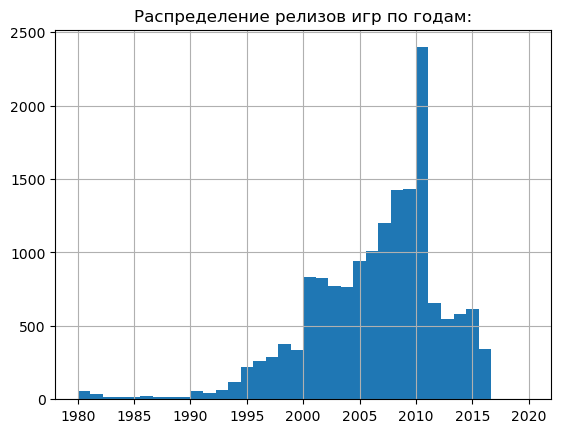

In [22]:
(df['year'].hist(bins=36).set(title='Распределение релизов игр по годам:'));

<b>Вывод:</b>

<li> По описательным статистикам видим большой разброс в выручке
<li> распределение годов скошено влево, 75% игр в данных, выпущены после 2003 года, но не позднее 2016. 
<li> вероятно в разных странах продажи значимо раздичаются, и похоже наибольший доход приносят продажи в Штатах

#### 2.4 Посчитаем суммарные продажи

In [23]:
df['global_sales']=df.na_sales+df.eu_sales+df.jp_sales+df.other_sales

In [24]:
df['global_sales'].describe()

count    16598.000000
mean         0.537164
std          1.555151
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: global_sales, dtype: float64

/Users/kadyr/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


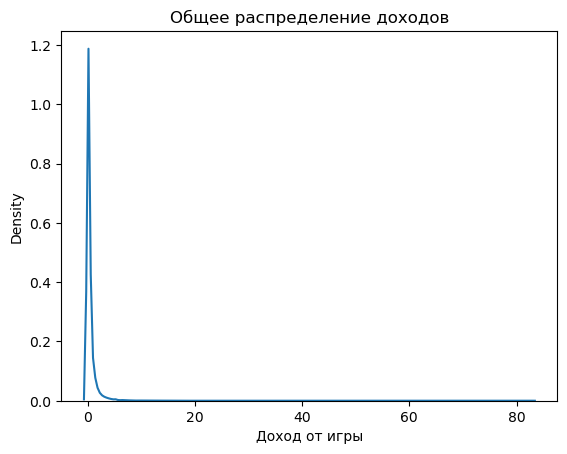

In [25]:
(sns.distplot(df['global_sales'], hist=False)
     .set(title='Общее распределение доходов', xlabel='Доход от игры')); #В данном примере нам нужно было использовать фнукцию displot

Распределение суммарных продаж скошено право, есть игры с общим доходом 0, у 75% игр из выборки продажи не превысилм 500 тысяч долларов.

# 3. Исследовательский анализ данных <a class="anchor" id="3"></a>

### 3.1 Сколько игр выпускалось в разные годы <a class="anchor" id="3.1"></a>

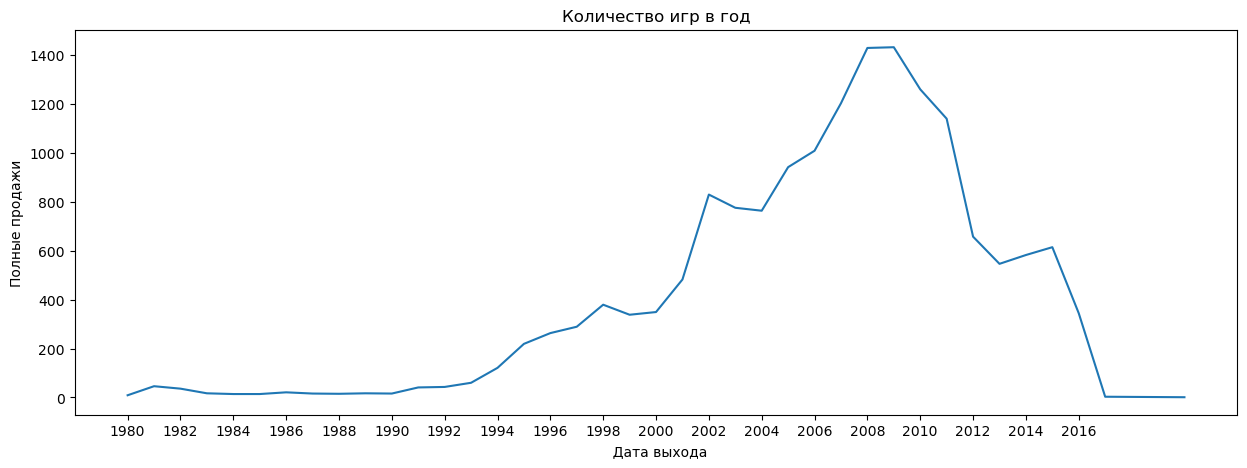

In [26]:
(df.pivot_table(index='year', values='global_sales', aggfunc='count')
     .plot(title = 'Количество игр в год', legend=False, figsize=(15,5))
     .set(xlabel='  Дата выхода', ylabel='Полные продажи'))

plt.xticks([y for y in range(1980,2017)[1980%2::2]]);

<b>Вывод:</b>
<li>Индустрия игр в целом имеет падающий тренд начиная с 2008 год, игр с каждым годом производится все меньше
<li> Максимальное количество игр в выборке было выпущено между 2006 и 2011 годами.
<li> Резкий скачок в индустрии произошел в 1993, 2001, 2004 и 2006 годах.
<li> до 1993 года количество игр выпускаемых игр в год было стабильно
<li> Наиболее важны данные за последние 10 лет, с 2006 по 2016 годы. В них попадает 50% игр из выборки, более ранние игры не имеет смысл рассматривать в виду значительных изменений, произошедших в индустрии и в обществе за это время.    

### 3.2 Какие платформы  актуальны: Топ-10 по продажам  <a class="anchor" id="3.2"></a>

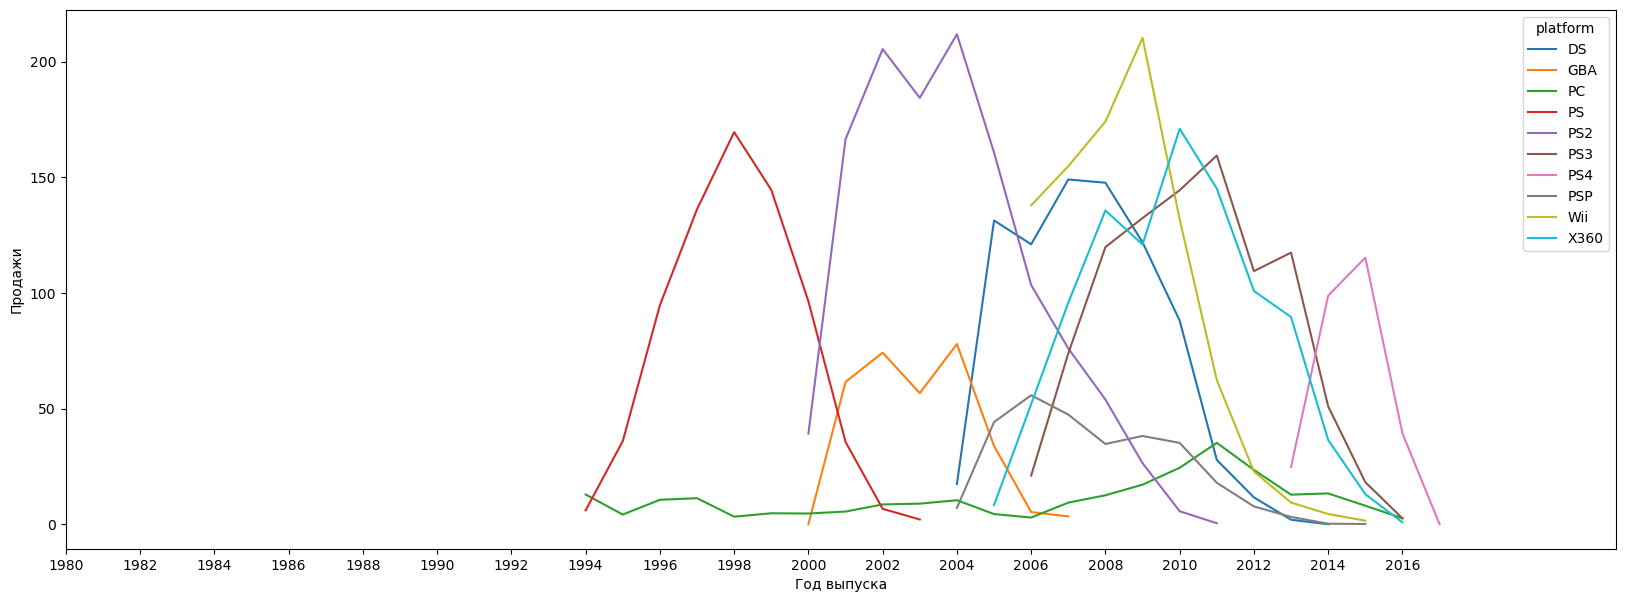

In [27]:
# создадим датафрейм с группировкой суммарных продаж по платформам и годам
sales_by_platform=(df.pivot_table(index='platform', columns='year', values='global_sales', aggfunc='sum')
                   .reset_index())

# построим график динамики суммарных продаж по годам, для платформ с самыми высоким продажами
# создалим объект series с топ-10 платформами по продажам, запишем в него имена и сумму продаж
best_platforms=(df.groupby('platform')['global_sales']
                .sum()
                .sort_values(ascending=False)[:10]
                .reset_index())

# отметим в датафрейме те платформы, которые вошли в топ-10 и выведем график продаж по годам
sales_by_platform['top10'] = (sales_by_platform.platform.isin(best_platforms.platform) == True)
(sales_by_platform[sales_by_platform['top10']==True]
     .set_index('platform').T.drop('top10') 
     .plot(figsize=(20,7))
     .set(xlabel='Год выпуска', ylabel='Продажи')) # Название графика по x и y оси
plt.xticks([y for y in range(1980,2017)[1980%2::2]]);


<li>Продажи игр начали активно расти после 1996 года.
<li>Суммарные продажи положительно коррелируют к количеством выпускаемых игр    
<li>Среднее время жизнии платформы - около 10 лет. 
<li>Продажи на большинстве платформ достигают пика в течение первых 2-3 лет после запуска, какое-то время находятся в точке максимума и затем постепенно снижаются. 
<li>Исключение - платформа PC, она существует с 1994 года, в 2011 году пережила пик, а в остальное время стабильно держит планку по продажам игр на ней.

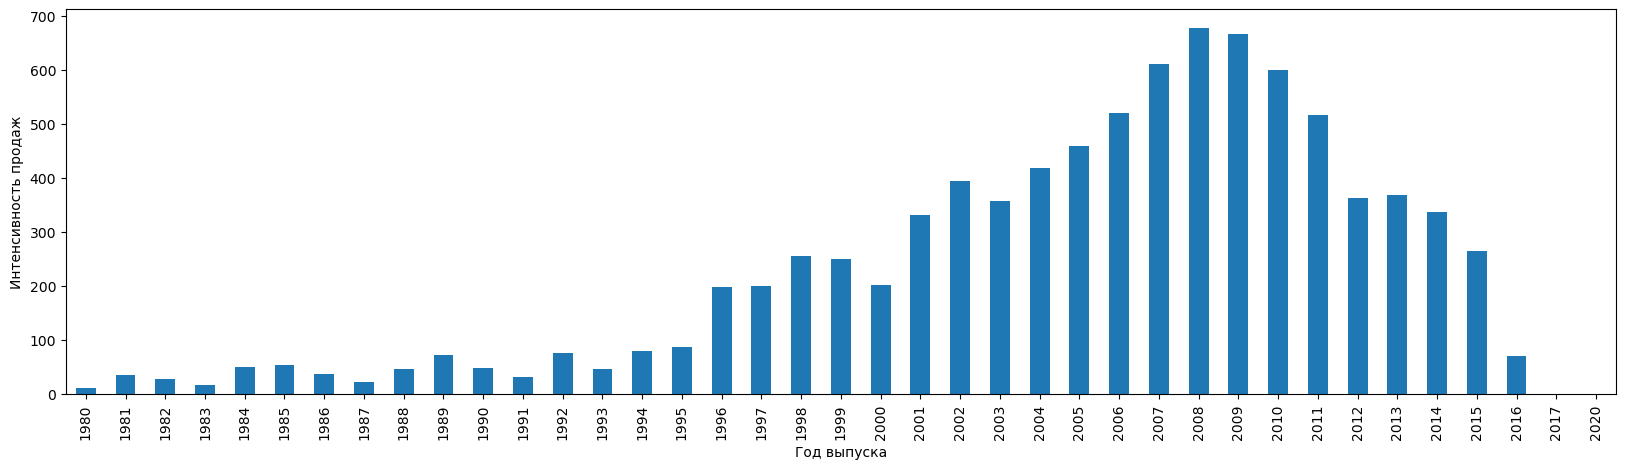

In [28]:
(sales_by_platform.set_index('platform')
     .drop(columns='top10')
     .sum()
     .plot(kind ='bar', figsize=(20,5))
     .set(xlabel='Год выпуска', ylabel='Интенсивность продаж'));


### 3.3 Анализ 2013-2016 годов <a class="anchor" id="3.3"></a>

Среднее время жизни платформы 10 лет, однако мир видеоигр довольно динамичен. Исходя их прошлых графиков, некоторые плотформы появились только в 2013г. При планировании 2017 года для принятия окончательного решения необходимо в первую очередь брать в расчет платформы и жанры, актуальные на 2016 год, поэтому проанализируем период за последние 4 года - с 2013 по 2016 годы.


In [29]:
#сохраним в отдельный датафрейм те игры, которые были выпущены после 2013 года
list_of_years=[ y for y in range(2013, 2017)]
df_2013_2016=df[df['year'].isin(list_of_years)]

### 3.3.1 Как меняются продажи по платформам <a class="anchor" id="3.3.1"></a>

platform
PS4     278.13
PS3     189.15
XOne    141.10
X360    139.84
3DS     132.50
dtype: float64

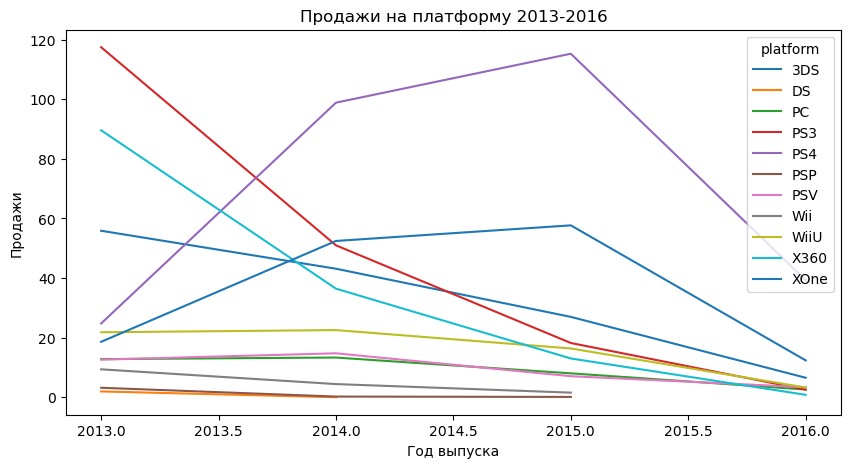

In [30]:
#построим график продаж для платформ по годам с 2013 года
platforms_2013_2016=df_2013_2016.pivot_table(index='platform', columns='year', values='global_sales', aggfunc='sum')

(platforms_2013_2016.T
     .plot(figsize=(10,5), title='Продажи на платформу 2013-2016')
     .set(xlabel='Год выпуска', ylabel='Продажи'));

platforms_2013_2016.T.sum().sort_values(ascending=False).head()

### 3.3.2 Как меняется количество игр по платформам <a class="anchor" id="3.3.2"></a>

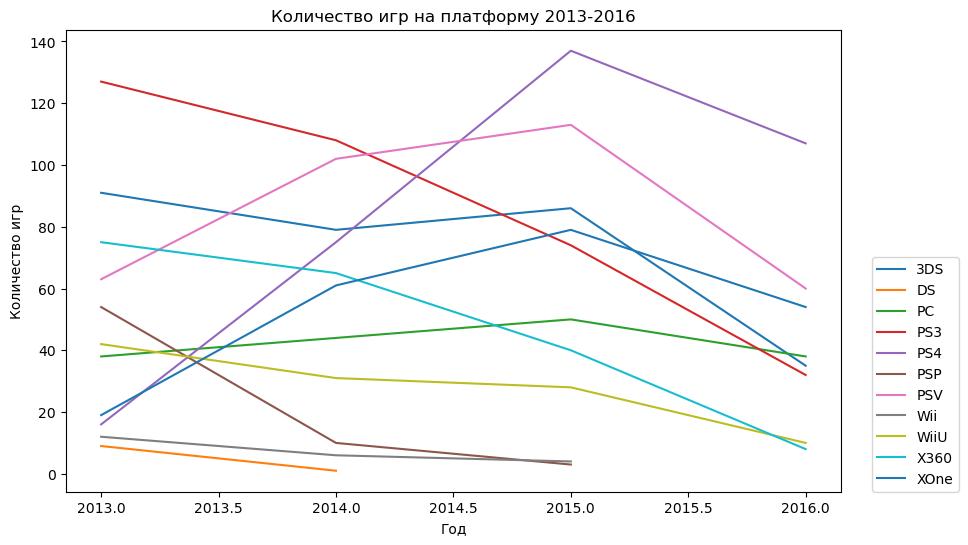

In [31]:
games_by_platform_2013_2016=df_2013_2016.pivot_table(index='platform', columns='year', values='name', aggfunc='count')

ax=games_by_platform_2013_2016.T.plot(figsize=(10,6), title='Количество игр на платформу 2013-2016');
ax.set(xlabel='Год', ylabel='Количество игр')
plt.legend(loc=(1.04,0));

<li> лидерами по глобальным продажам в период с 2013 по 2016 год являются PS4,  Xone, 3DS/
<li> продажи по всем платформам, кроме PS4 и PC падали. 
<li> PS4 и  PC - новые платформы которые активно росли в продажах до 2016 год, однако в 2016 тоже начали падать. тем не менее они сохраняют за собой большую часть рынка.
<li> <b> PS4 и PC также активнее других развиваются, приращивают количество игр и являются наиболее перспективными.

###  Продажи игр на разных платформах 

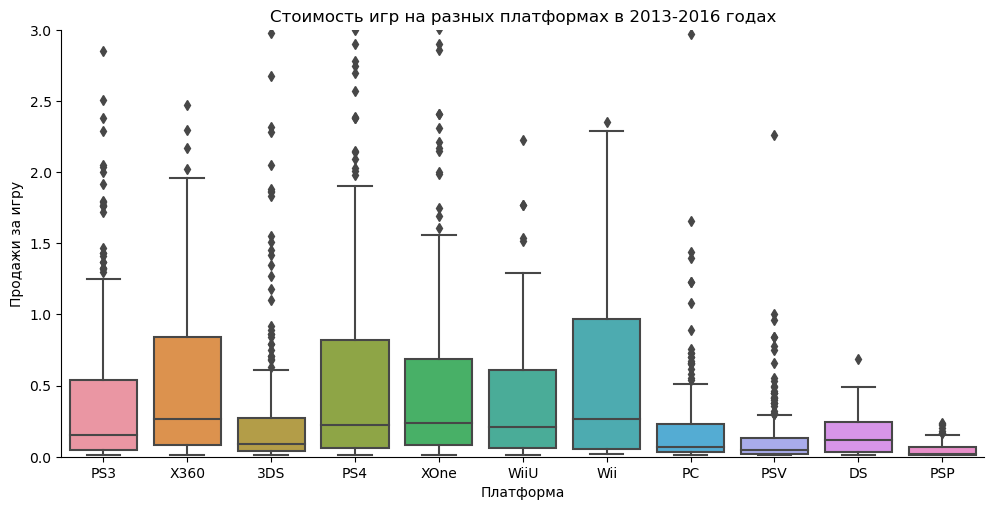

In [32]:
ax=sns.catplot(x="platform", y="global_sales",
            kind="box", dodge=False, data=df_2013_2016, height=5, aspect=2)\
            .set(title='Стоимость игр на разных платформах в 2013-2016 годах', ylim=(0,3))
ax.set(xlabel='Платформа', ylabel='Продажи за игру');

<li> лидерами по средней стоимости за игру в период с 2013 по 2016 год являются X360, Wii, Xone, PS4, PS3.
<li> самая низкая стоимость игры в среднем на PC и PSV, при этом по количеству игр выпущенных в 2016 году платформа PC занимает 4 место.


In [33]:
#Создадим новый столбец с суммой нормированных продажами игр
df_2013_2016['na_sales']=df_2013_2016['eu_sales']+ df_2013_2016['jp_sales']*10

#выделим в отдельный датафрейм игры для PS4
PS4_2013_2016=df_2013_2016.query('platform=="PS4"')
PS4_2013_2016[PS4_2013_2016.columns[4:]].corr()

/var/folders/4g/x966n1ts5w7f78pg2515mz800000gn/T/ipykernel_1324/638273961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_2016['na_sales']=df_2013_2016['eu_sales']+ df_2013_2016['jp_sales']*10


,na_sales,eu_sales,jp_sales,other_sales,global_sales
na_sales,1.000000,0.870468,0.831442,0.847922,0.877878
eu_sales,0.870468,1.000000,0.450258,0.950633,0.960462
jp_sales,0.831442,0.450258,1.000000,0.465084,0.508330
other_sales,0.847922,0.950633,0.465084,1.000000,0.990531
global_sales,0.877878,0.960462,0.508330,0.990531,1.000000


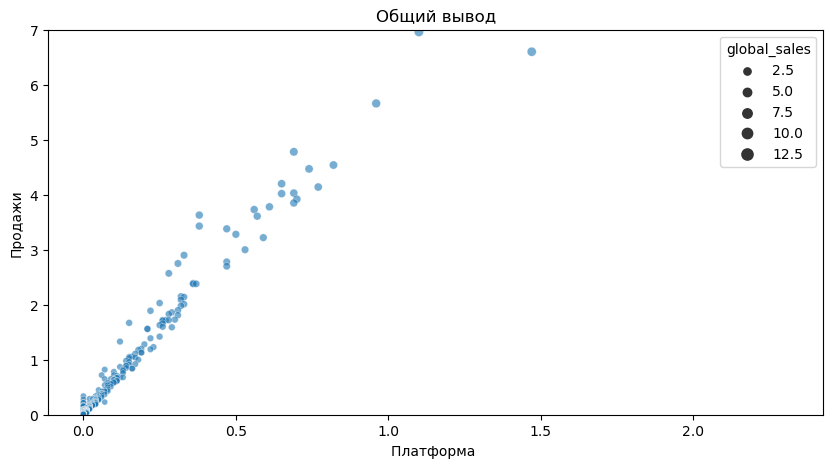

In [34]:
fig,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(x="other_sales", y="global_sales", size="global_sales", data=PS4_2013_2016, alpha=0.6).set(ylim=(0,7));
ax.set(xlabel='Платформа ', ylabel='Продажи', title='Общий вывод');

#### Продажи игр на других платформах

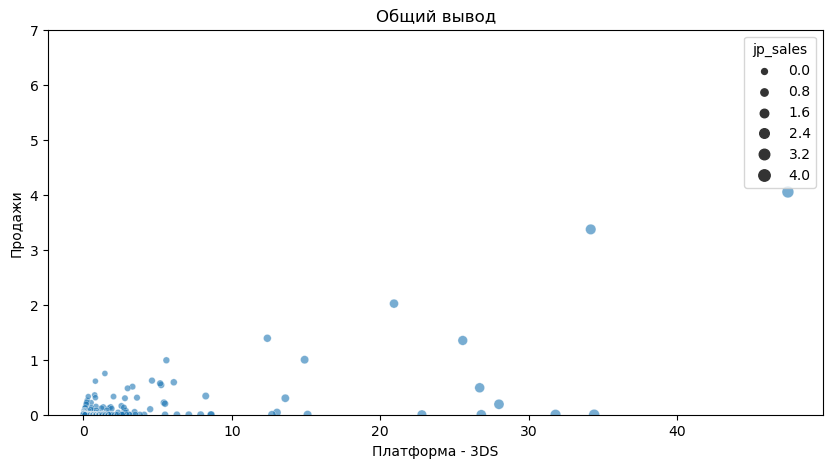

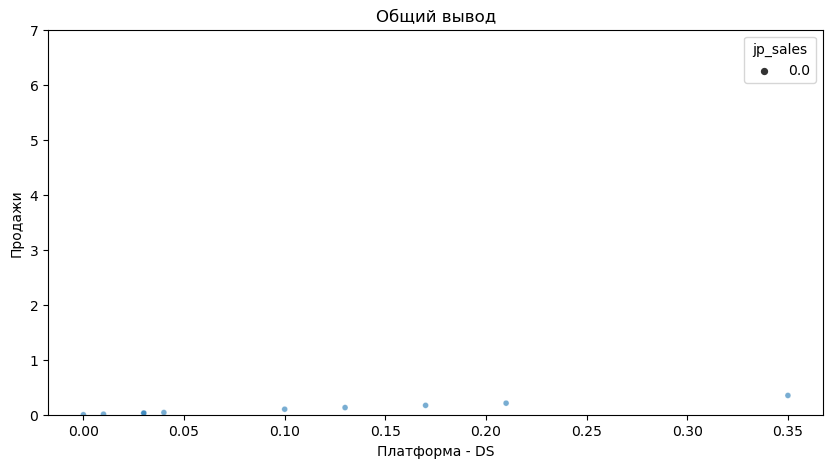

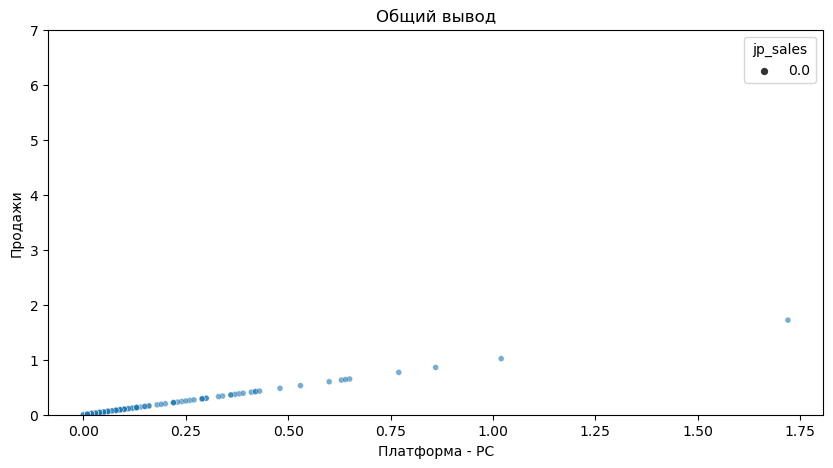

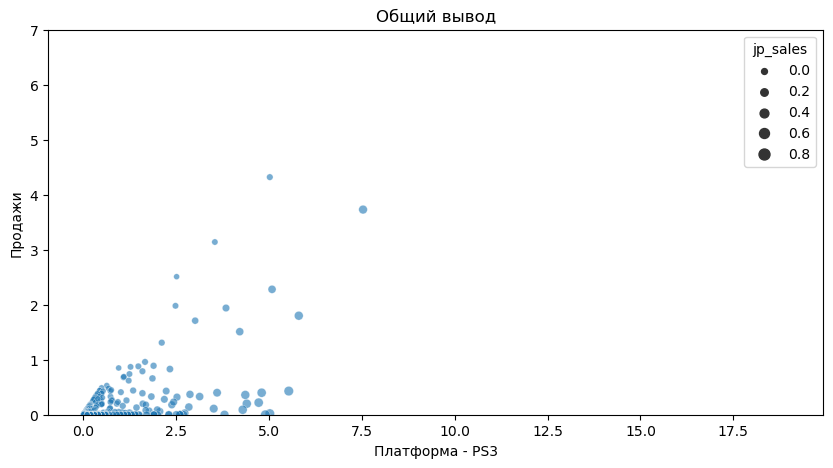

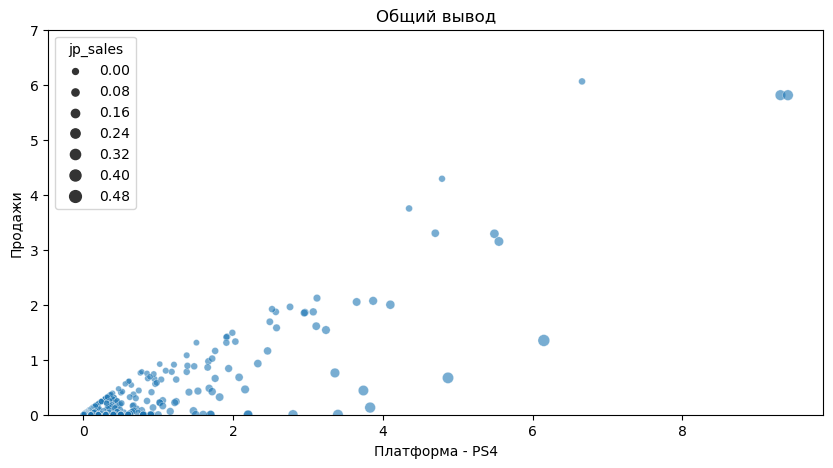

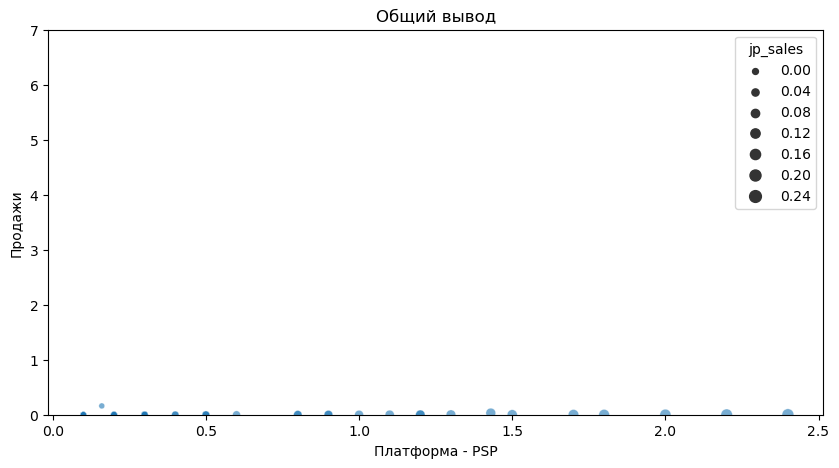

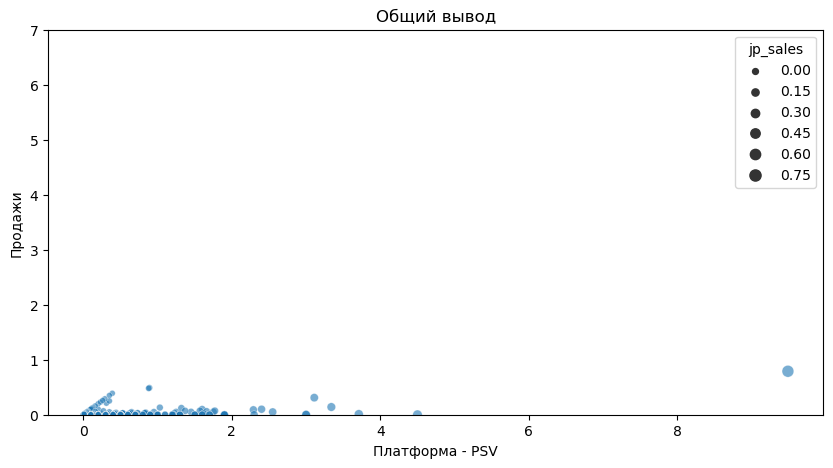

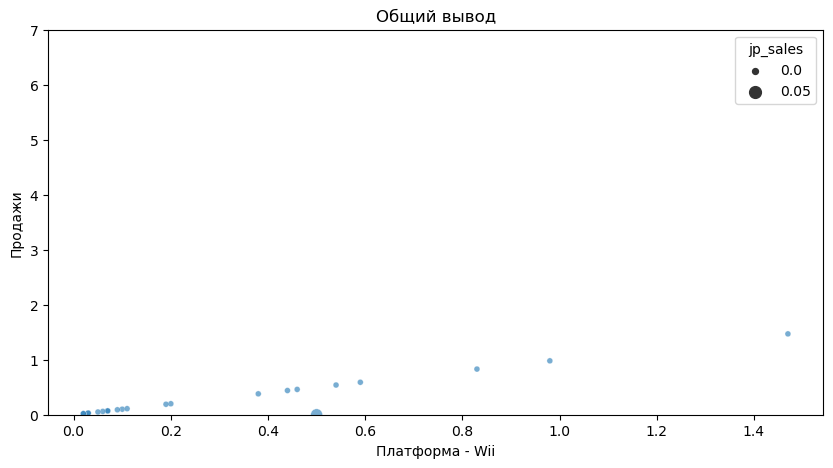

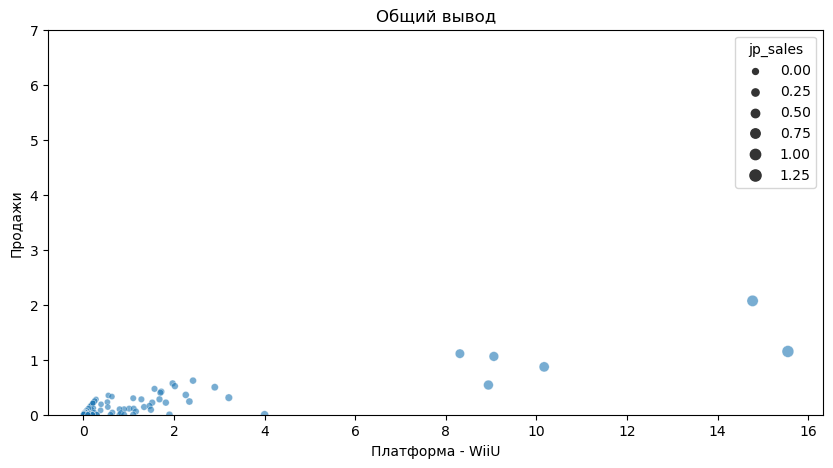

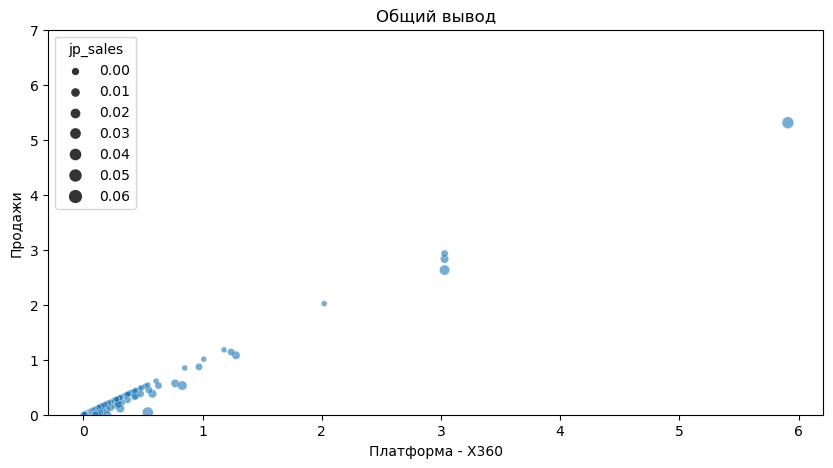

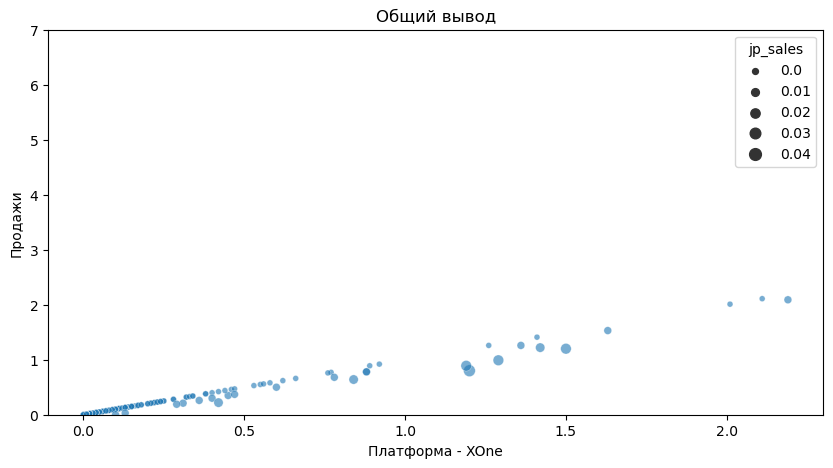

In [35]:
for p in platforms_2013_2016.index:
    plat_2013_2016=df_2013_2016.query('platform==@p')
    fig,ax=plt.subplots(figsize=(10,5))
    (sns.scatterplot(x="na_sales", y="eu_sales", size="jp_sales", data=plat_2013_2016, alpha=0.6)
         .set(ylim=(0,7), title=p))
    ax.set(xlabel='Платформа - ' + p, ylabel='Продажи', title='Общий вывод');


<li> Игры на некоторых платформах не имеют корреляции.
<li> Игры на PS, добившиеся высоких продаж, в среднем имеют более высокий рейтинг, чем игры на других платформах.    
  

### 3.4 Самые популярные, прибыльные и дорогие жанры игр  <a class="anchor" id="3.4"></a>

In [36]:
first_sales = df["global_sales"].head(30)
first_sales

0     82.74
1     40.24
2     35.83
3     33.00
4     31.38
5     30.26
6     30.01
7     29.01
8     28.61
9     28.31
10    24.75
11    23.43
12    23.09
13    22.72
14    22.00
15    21.82
16    21.39
17    20.81
18    20.62
19    20.22
20    18.35
21    18.14
22    17.28
23    16.38
24    16.15
25    15.84
26    15.32
27    15.30
28    14.97
29    14.76
Name: global_sales, dtype: float64

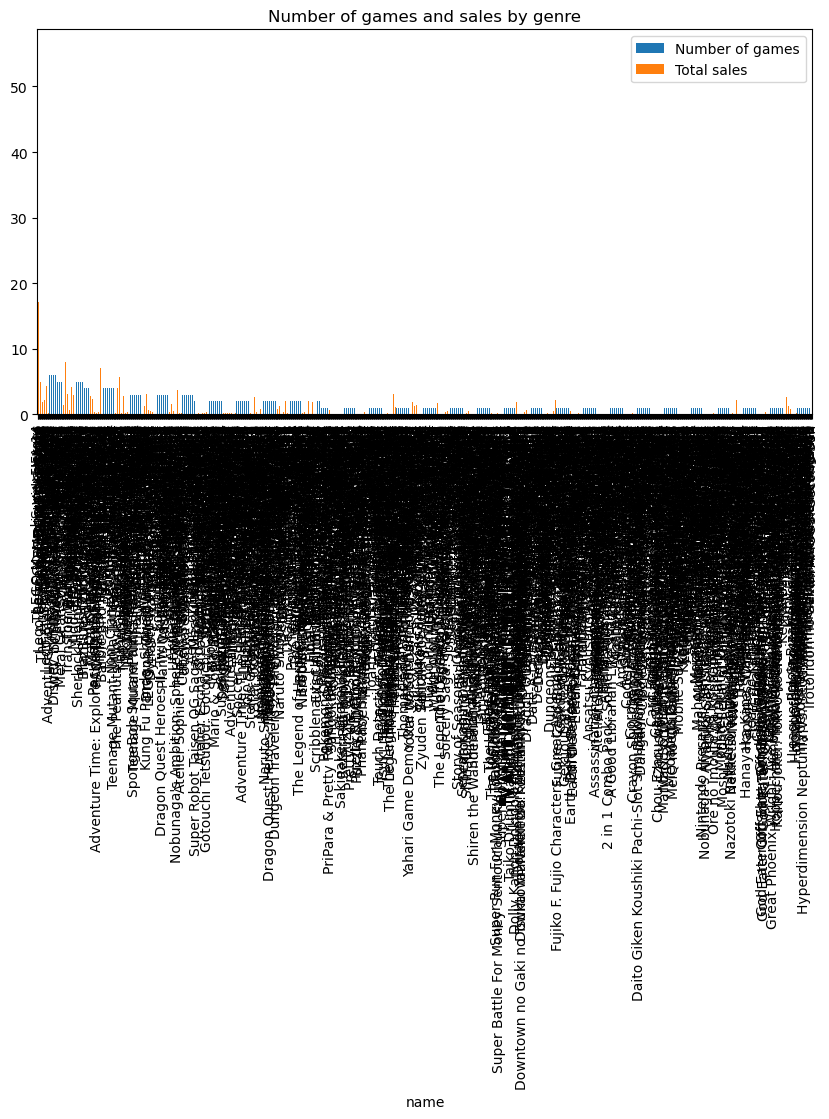

In [37]:
genres_2013_2016=df_2013_2016.pivot_table(index='name', values='global_sales', aggfunc=('count','sum'))
genres_2013_2016.columns=('Number of games', 'Total sales')

(genres_2013_2016.sort_values(by='Number of games', ascending=False)
     .plot(kind='bar', figsize=(10,5), title='Number of games and sales by genre'));

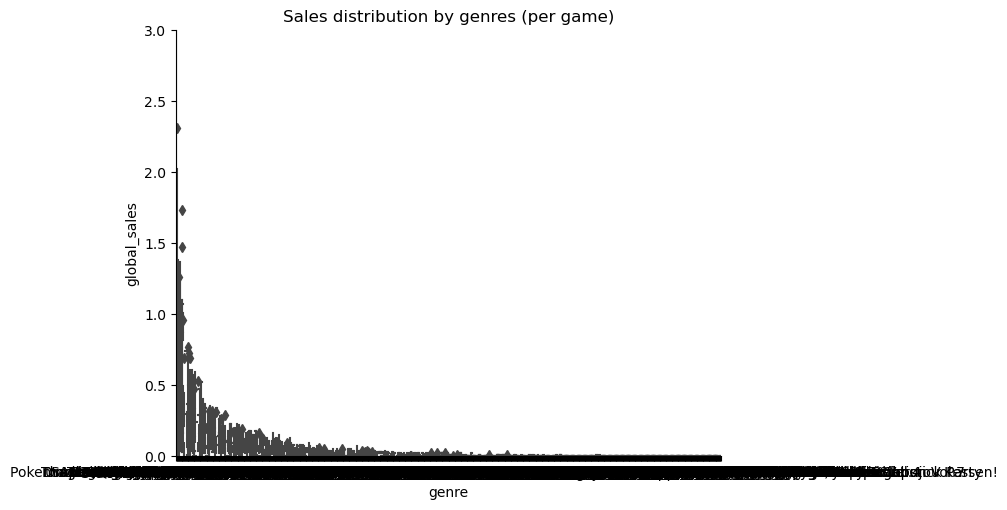

In [38]:
ax=sns.catplot(data=df_2013_2016, x='name', y='other_sales', kind="box", height=5, aspect=2).set(ylim=(0,3))
ax.set(xlabel='genre', ylabel='global_sales', title='Sales distribution by genres (per game)');

###  Топ-5 платформ  <a class="anchor" id="4.1"></a>
#### Топ-5 платформ 2013-2016

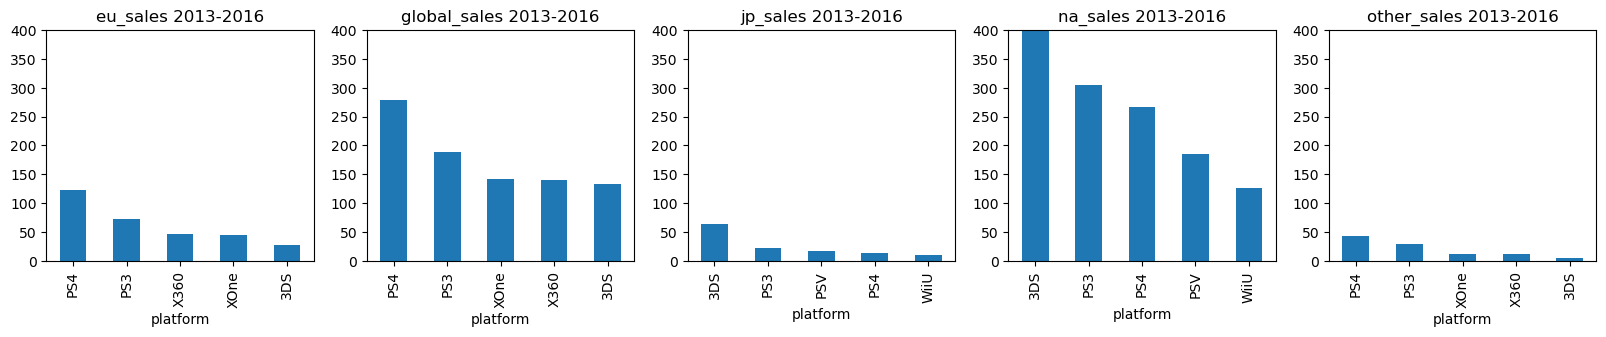

In [39]:
#создадим сводную таблицу, где рассчитаем продажи по каждой платформе
sales_by_reg_2013_2016=(df_2013_2016
                        .pivot_table(index='platform', \
                                     values=('na_sales','eu_sales', 'jp_sales','other_sales','global_sales'), aggfunc='sum' ));

#выведем на печать топ 5 платформ по продажам для каждого региона
plt.figure(figsize=(20, 3))
for i, reg in enumerate(sales_by_reg_2013_2016.columns, 1):
    plt.subplot(1, 5, i)
    (sales_by_reg_2013_2016[reg].sort_values(ascending=False)
         .head(5)
         .plot(kind='bar', title=reg+' 2013-2016', x=plt.gca(),ylim=(0,400)))
   


In [40]:
#Вычислим сумму продаж по каждому рынку и посчитаем аффинити ддя каждой из платформ на каждом рынке
affinity_by_reg_2013_2016=df_2013_2016.pivot_table(index='platform', values=('na_sales','eu_sales', 'jp_sales','other_sales'), aggfunc='sum' ).T
affinity_by_reg_2013_2016['total_sales_in_stock']=affinity_by_reg_2013_2016.sum(axis=1)
affinity_by_reg_2013_2016[['3DS_aff','DS_aff','PC_aff','PS3_aff','PS4_aff',\
                           'PSP_aff','PSV_aff','Wii_aff','WiiU_aff','X360_aff','XOne_aff']]\
                        =affinity_by_reg_2013_2016[['3DS','DS','PC','PS3','PS4',\
                                                    'PSP','PSV','Wii','WiiU','X360','XOne']]\
                        .apply(lambda x: x/(affinity_by_reg_2013_2016['total_sales_in_stock']/11), result_type='expand')

affinity_by_reg_2013_2016

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,...,DS_aff,PC_aff,PS3_aff,PS4_aff,PSP_aff,PSV_aff,Wii_aff,WiiU_aff,X360_aff,XOne_aff
eu_sales,28.29,1.07,22.83,73.46,123.70,0.19,8.21,6.73,18.98,46.81,...,0.031310,0.668041,2.149553,3.619653,0.005560,0.240237,0.196930,0.555384,1.369733,1.335790
jp_sales,64.58,0.00,0.00,23.15,14.27,3.29,17.62,0.05,10.66,0.51,...,0.000000,0.000000,1.893731,1.167324,0.269131,1.441362,0.004090,0.872016,0.041719,0.027813
na_sales,674.09,1.07,22.83,304.96,266.40,33.09,184.41,7.23,125.58,51.91,...,0.006841,0.145953,1.949623,1.703107,0.211546,1.178941,0.046222,0.802839,0.331863,0.313579
other_sales,5.62,0.17,3.65,29.95,43.36,0.07,4.57,1.29,5.17,11.83,...,0.015901,0.341412,2.801446,4.055782,0.006548,0.427466,0.120663,0.483588,1.106548,1.114966


### 4.2 Топ-5 жанров 2013-2016 <a class="anchor" id="4.2"></a>

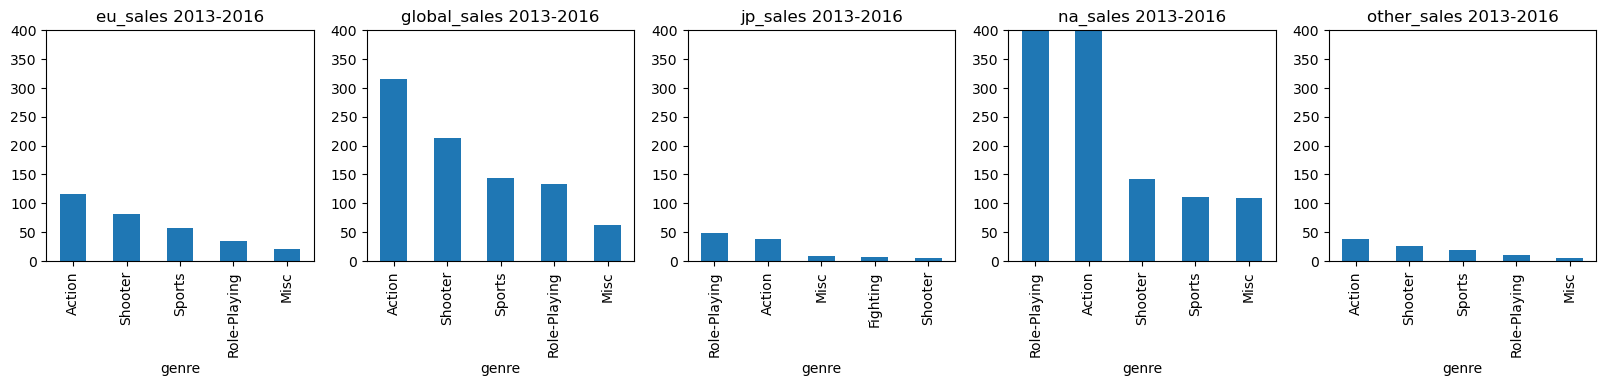

In [41]:
#создадим сводную таблицу, где рассчитаем продажи по каждому жанру
genres_by_reg_2013_2016=df_2013_2016.pivot_table(index='genre', values=('na_sales','eu_sales', 'jp_sales','other_sales','global_sales'), aggfunc='sum' )

#выведем на печать топ 5 платформ по продажам для каждого региона
plt.figure(figsize=(20, 3))
for i, reg in enumerate(genres_by_reg_2013_2016.columns, 1):
    plt.subplot(1, 5, i)
    (genres_by_reg_2013_2016[reg].sort_values(ascending=False)
                                 .head(5)
                                 .plot(kind='bar', title=reg+' 2013-2016', x=plt.gca(),ylim=(0,400)));
   


<li>Больше всего игр выпускается в жанре Action, но и рынок игр этого жанра занимает самую бОльшую долю по продажам.
<li>На втором  и третьем месте ролевые игры и приключения, однако размер их продаж невелик и значительно уступает шутерам и спорту.
<li> В среднем самые прибыльные жанры - это шутеры и спорт, а самые неприбыльные -приключения и паззлы.     
    
  

In [42]:
#Вычислим сумму продаж по каждому рынку и посчитаем аффинити ддя каждой из платформ на каждом рынке
affinity_genres_2013_2016=df_2013_2016.pivot_table(index='genre', values=('na_sales','eu_sales', 'jp_sales','other_sales'), aggfunc='sum' ).T
affinity_genres_2013_2016['total_sales_in_stock']=affinity_genres_2013_2016.sum(axis=1)
affinity_genres_2013_2016[['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']]=affinity_genres_2013_2016[['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']].apply(lambda x: x/(affinity_genres_2013_2016['total_sales_in_stock']/12), result_type='expand')
affinity_genres_2013_2016

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,total_sales_in_stock
eu_sales,3.725261,0.250585,0.272930,0.643860,0.491594,0.030964,0.635242,1.085018,2.582145,0.306448,1.848585,0.127368,375.92
jp_sales,3.482115,0.498847,0.670187,0.789767,0.422994,0.105302,0.204358,4.275452,0.545252,0.397115,0.468506,0.140106,134.47
na_sales,3.535237,0.444607,0.583394,0.757890,0.437982,0.089061,0.298497,3.578408,0.990271,0.377306,0.770025,0.137323,1720.62
other_sales,3.856122,0.247959,0.375510,0.631633,0.410204,0.019388,0.485714,1.088776,2.689796,0.159184,1.950000,0.085714,117.60


###  Подведем итоги 

<li> Пользователи на американском рынке любяи платформы PS4, X360 и Xone и игры в жанрах экшн и шутеры, по рейтингу наибольшей популярностью пользуются игры для взрослых и детей 10+
<li> Пользователи из Европы похожи на американцев. Но они чаще всего используют приставку PS4, несколько меньше в ходу X360 и Xone. Жанры экш и шутеры с маркировкаой для взрослых и детей 10+ в лидерах, как и в Штатах.
<li> Японский рынок не похож на другие. Здесь с больгим отрывом популярны игры в жанре Role Playing. На втором и третьем местах action и misc. Лидер по платформам в Японии - 3DS. Популярны игры для подростков.
<li> Остальные рынки похожи на американский и европейский. Там также популярна платформа PS4 и ее предыдущая версия PS3, жанры экшн и шутеры, категории для взрослых и 10+.   

<b> Жанр экшн любят больше. </b>

## Общие выводы:
<ol>
<li> Штаты являются самым крупным рынком компьютерных игр, на втором месте Европе, на третьем Япония и остальны страны. Доля остальных стран сравнима с японским рынком.  
<li>Наиболее перспективные и активно развивающиеся платформы на конец 2016 года -  PS4
<li> При этом средняя стоимость игр на платформах различается и наиболее высокодоходными являются игры для X360, Sony PS4 и Sony PS3. Имеет смысл в первую очередь обратить внимание на PS4, поскольку это новая платформа, являющаяся реинкарнацией PS3 и имеющая большой потенциал.
<li> Игры на платформе Sony наиболее популярны в Европе, в Штатах большую популярность имеет Xbox, в Японии Нинтендо. Можно ожидать, что новое поколение платформ этих брендов может распределиться подобным же образом. И с этой точки зрения на европейском рынке имеет смысл продвигать игры на PS4, в Штатах - для Xone, а в Японии - 3DS. Если же по каким-либо причинам невозможно (например, выбор игр выпущенных нашей компаней сильно ограничен или ограничен бюджет), то приоритет лучше отдать играм на PS4, поскольку они достаточно популярны на всех рынках.
<li> На конец 2016 года в Штатах и Европе самыми популярными и прибыльными являются шутеры и экшн, в Японии - ролевые. Если выбирать наиболее универсальный жанр для всех рынков - это Action.